In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter
import matplotlib.ticker as ticker




In [43]:
df = pd.read_excel("VentasTech.xlsx")
print(df)

      Fecha De Venta                          Ubicación  \
0         2020-06-01  Estados Unidos, América del Norte   
1         2020-06-01  Estados Unidos, América del Norte   
2         2020-06-01            Brasil, América del Sur   
3         2020-06-01  Estados Unidos, América del Norte   
4         2020-06-01  Estados Unidos, América del Norte   
...              ...                                ...   
22394     2022-08-31  Estados Unidos, América del Norte   
22395     2022-08-31            Brasil, América del Sur   
22396     2022-08-31                Reino Unido, Europa   
22397     2022-08-31  Estados Unidos, América del Norte   
22398     2022-08-31  Estados Unidos, América del Norte   

                                                Producto     Marca  \
0                                     360 Ventilador Pro     Sonos   
1                                     360 Ventilador Pro     Sonos   
2                            Simulador de Combate 3 E119  Kid Toys   
3          

In [44]:
df.head()

,Fecha De Venta,Ubicación,Producto,Marca,Categoría,Precio Unidad,Costo Unidad,Cantidad Vendida,Facturación
0,2020-06-01,"Estados Unidos, América del Norte",360 Ventilador Pro,Sonos,Ventilador,215.62,71.44,1.0,215.62
1,2020-06-01,"Estados Unidos, América del Norte",360 Ventilador Pro,Sonos,Ventilador,215.62,71.44,1.0,215.62
2,2020-06-01,"Brasil, América del Sur",Simulador de Combate 3 E119,Kid Toys,Juegos,28.00,14.28,1.0,28.00
3,2020-06-01,"Estados Unidos, América del Norte",Age of Mythology 2009 E158,Kid Toys,Juegos,32.00,16.31,1.0,32.00
4,2020-06-01,"Estados Unidos, América del Norte",Age of Mythology 2009 E158,Kid Toys,Juegos,32.00,16.31,1.0,32.00


In [45]:
# Verificar valores nulos en cada columna
print(df.isnull().sum())


Fecha De Venta      6
Ubicación           6
Producto            6
Marca               6
Categoría           6
Precio Unidad       6
Costo Unidad        6
Cantidad Vendida    6
Facturación         6
dtype: int64


In [46]:
# Verificar la cantidad de valores duplicados
duplicados = df.duplicated()
print(duplicados.sum())


2741


In [47]:
# Ver las filas duplicadas
df[duplicados]


,Fecha De Venta,Ubicación,Producto,Marca,Categoría,Precio Unidad,Costo Unidad,Cantidad Vendida,Facturación
1,2020-06-01,"Estados Unidos, América del Norte",360 Ventilador Pro,Sonos,Ventilador,215.62,71.44,1.0,215.62
4,2020-06-01,"Estados Unidos, América del Norte",Age of Mythology 2009 E158,Kid Toys,Juegos,32.00,16.31,1.0,32.00
5,2020-06-01,"Estados Unidos, América del Norte",Age of Mythology 2009 E158,Kid Toys,Juegos,32.00,16.31,1.0,32.00
9,2020-06-01,"Estados Unidos, América del Norte",Juego Mesa for kids E300 Prata,Kid Toys,Juegos de mesa,5.50,2.80,1.0,5.50
18,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
22377,2022-08-31,"Estados Unidos, América del Norte",Juego Mesa for kids E300 Prata,Kid Toys,Juegos de mesa,5.50,2.80,1.0,5.50
22381,2022-08-31,"Estados Unidos, América del Norte",Sistema de Som 2.1 Channel M1210 Prata,Microsoft,Sistema de sonido,329.00,167.73,1.0,329.00
22390,2022-08-31,"Estados Unidos, América del Norte",Wireless Azultooth Stereo Headphones M402 Verde,Ninja,Auriculares Bluetooth,99.99,45.98,5.0,499.95
22394,2022-08-31,"Estados Unidos, América del Norte",Headphone Azultooth M150 Azul,Ninja,Auriculares Bluetooth,149.99,49.69,2.0,299.98


In [ ]:
# 1. Eliminar duplicados 
df = df.drop_duplicates()

# 2. Eliminar filas con al menos un valor nulo
df = df.dropna()

In [49]:
# ¿Quedan duplicados?
print("Duplicados restantes:", df.duplicated().sum())

# ¿Quedan nulos?
print("Nulos restantes por columna:\n", df.isnull().sum())


Duplicados restantes: 0
Nulos restantes por columna:
 Fecha De Venta      0
Ubicación           0
Producto            0
Marca               0
Categoría           0
Precio Unidad       0
Costo Unidad        0
Cantidad Vendida    0
Facturación         0
dtype: int64


In [50]:
# Validar la nueva cantidad de filas despues de la limpieza
print(df.shape)  


(19657, 9)


In [51]:
# Crear dos columnas nuevas a partir de la columna Ubicacion, se crean dos nuevas que son 'Pais'
# y 'Continente'
df[['País', 'Continente']] = df['Ubicación'].str.split(', ', expand=True)

In [ ]:
# se usa 'head' para validar las dos nuevas columnas 'Pais' y 'Continente' 
df.head()

,Fecha De Venta,Ubicación,Producto,Marca,Categoría,Precio Unidad,Costo Unidad,Cantidad Vendida,Facturación,País,Continente
0,2020-06-01,"Estados Unidos, América del Norte",360 Ventilador Pro,Sonos,Ventilador,215.62,71.44,1.0,215.62,Estados Unidos,América del Norte
2,2020-06-01,"Brasil, América del Sur",Simulador de Combate 3 E119,Kid Toys,Juegos,28.00,14.28,1.0,28.00,Brasil,América del Sur
3,2020-06-01,"Estados Unidos, América del Norte",Age of Mythology 2009 E158,Kid Toys,Juegos,32.00,16.31,1.0,32.00,Estados Unidos,América del Norte
6,2020-06-01,"Francia, Europa",Fable: The Lost Chapters E107,Kid Toys,Juegos,56.00,28.55,5.0,280.00,Francia,Europa
7,2020-06-01,"Estados Unidos, América del Norte",Juego Mesa for kids E300 Prata,Kid Toys,Juegos de mesa,5.50,2.80,1.0,5.50,Estados Unidos,América del Norte


In [53]:
# eliminar la columna ubicacion 
df = df.drop('Ubicación', axis=1)


In [54]:
# crear dos nuevas columnas año y mes
df['Año'] = df['Fecha De Venta'].dt.year
df['Mes'] = df['Fecha De Venta'].dt.month

In [55]:
# Validar que la columna Ubicacion ya no existe y se hayan creado 'Año' y 'Mes'
df.head()

,Fecha De Venta,Producto,Marca,Categoría,Precio Unidad,Costo Unidad,Cantidad Vendida,Facturación,País,Continente,Año,Mes
0,2020-06-01,360 Ventilador Pro,Sonos,Ventilador,215.62,71.44,1.0,215.62,Estados Unidos,América del Norte,2020,6
2,2020-06-01,Simulador de Combate 3 E119,Kid Toys,Juegos,28.00,14.28,1.0,28.00,Brasil,América del Sur,2020,6
3,2020-06-01,Age of Mythology 2009 E158,Kid Toys,Juegos,32.00,16.31,1.0,32.00,Estados Unidos,América del Norte,2020,6
6,2020-06-01,Fable: The Lost Chapters E107,Kid Toys,Juegos,56.00,28.55,5.0,280.00,Francia,Europa,2020,6
7,2020-06-01,Juego Mesa for kids E300 Prata,Kid Toys,Juegos de mesa,5.50,2.80,1.0,5.50,Estados Unidos,América del Norte,2020,6


C:\Users\Leo\AppData\Local\Temp\ipykernel_14484\373925034.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ventas_por_pais.values, y=ventas_por_pais.index, palette="viridis")


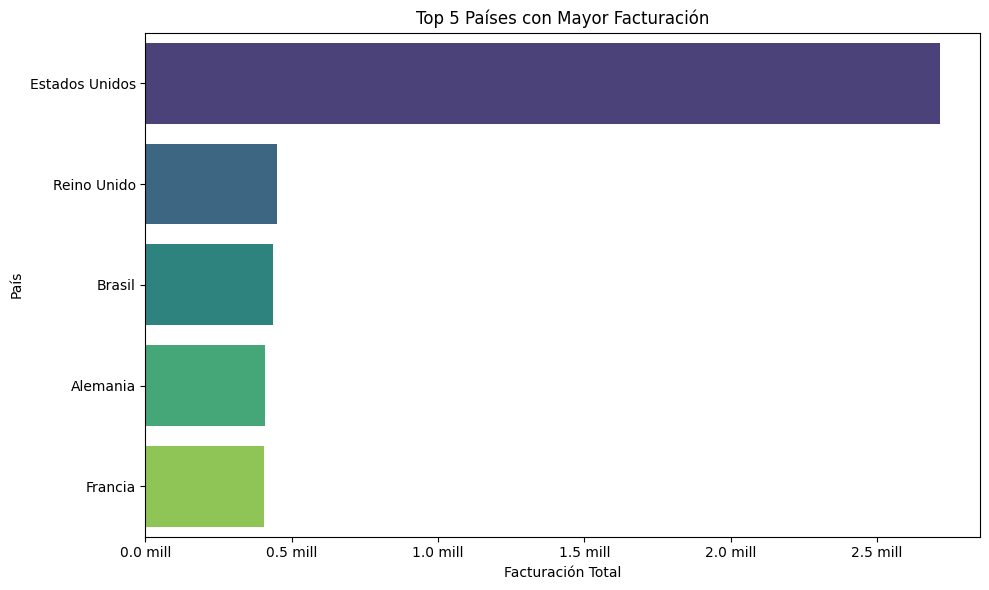

In [ ]:
# paises con mayor facturacion en los tres años
ventas_por_pais = df.groupby('País')['Facturación'].sum().sort_values(ascending=False).head(5)

plt.figure(figsize=(10, 6))
sns.barplot(x=ventas_por_pais.values, y=ventas_por_pais.index, palette="viridis")
plt.title("Top 5 Países con Mayor Facturación")
plt.xlabel("Facturación Total")
plt.ylabel("País")

# 👇 Formatear el eje X a millones
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x*1e-6:.1f} mill'))

plt.tight_layout()
plt.show()

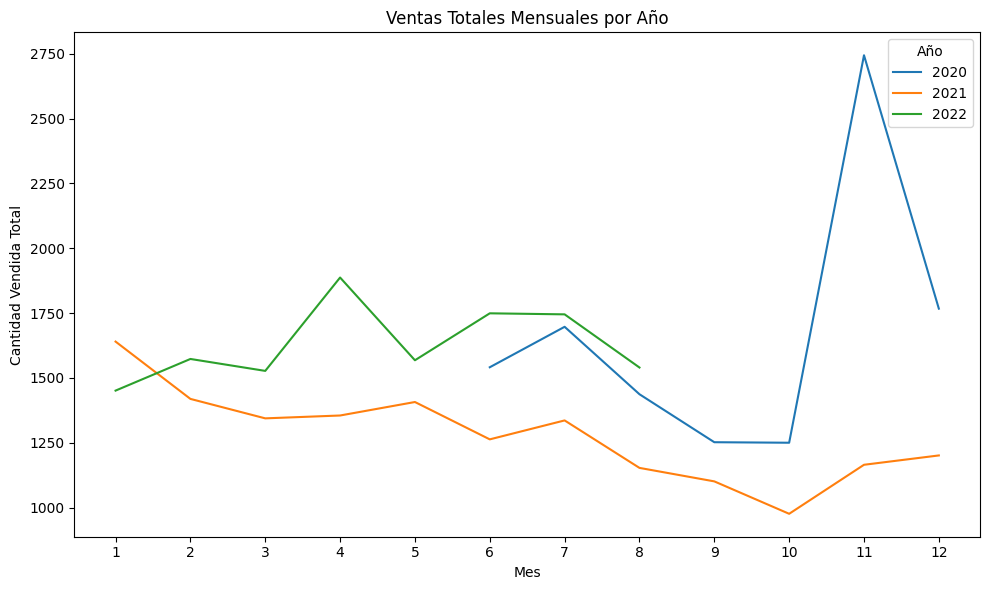

In [73]:
# Agrupar las ventas totales por año y mes
ventas_mes = df.groupby(['Año', 'Mes'])['Cantidad Vendida'].sum().reset_index()

# Crear una tabla dinámica para organizar los datos por mes y año
pivot = ventas_mes.pivot(index='Mes', columns='Año', values='Cantidad Vendida')

# Crear el gráfico de líneas
plt.figure(figsize=(10, 6))
for año in pivot.columns:
    plt.plot(pivot.index, pivot[año], label=str(año))

plt.title("Ventas Totales Mensuales por Año")
plt.xlabel("Mes")
plt.ylabel("Cantidad Vendida Total")
plt.xticks(pivot.index)
plt.legend(title="Año")
plt.tight_layout()
plt.show()
